In [21]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

In [22]:
class AgentState(TypedDict):
    name: str
    values: List[int]
    result: str

In [23]:
def process_values(state: AgentState) -> AgentState:
    """this function handels multible different inputs"""
    print(state)
    state["result"] = f"hi {state['name']}, Sum of values: {sum(state['values'])}"
    print(state)
    return state

In [24]:
graph = StateGraph(AgentState)
graph.add_node("process_values", process_values)
graph.set_entry_point("process_values")
graph.add_edge(START, "process_values")
graph.set_finish_point("process_values")
app = graph.compile()

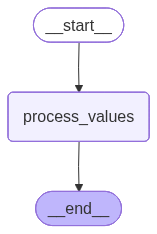

In [25]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [27]:
results = app.invoke({"name": "bob", "values": [1, 2, 3, 4, 5]})

{'name': 'bob', 'values': [1, 2, 3, 4, 5]}
{'name': 'bob', 'values': [1, 2, 3, 4, 5], 'result': 'hi bob, Sum of values: 15'}
